## TAREA: Kernel Ridge Regression (KRR)

## Realizado por Jesús Martínez Leal y Miguel Muñoz Blat

## 

Regresión no-lineal regularizada.

* Generar conjunto de entrenamiento para predecir la función seno. 
* Expandir entradas en potencias (matriz de Vandermonde) para el ajuste polinómico con el regresor lineal (LR) y regresor lineal regularizado (LRR)
* Obtener pesos optimos para LR, LRR y KRR
* Calcula la salida para datos de test [0,2pi]
* Representa la salida estimada y la deseada

Analiza los resultados:
* Modifica la constante de regularización.
* Modifica la anchura del kernel RBF.
* Modifica el orden del ajuste polinómico. 

### Manera "manual"

Empezamos generando el conjunto de entrenamiento para predecir la función seno.

In [45]:
import numpy as np

# Genero N datos de train
N = 12

#X = np.linspace(0, np.pi * 2.0, N)
rng = np.random.RandomState(4)
X_train = rng.uniform(0, np.pi * 2.0, N)[:, np.newaxis]
y_train = np.sin(X_train)
print(X_train.shape[0])

12


Entrenamos modelos lineales. Se incluirá regularización y la expansión en potencias (matriz de Vandermonde).

In [46]:
# Entreno modelos lineales

# Variable de entrada constante a uno para incluir bias en los pesos 
def addones(XX):
    return np.concatenate([np.ones((XX.shape[0], 1)), XX], axis = 1) # columna de unos al inicio

XX = X_train
M = 5 # M < 2 linear regression ; M >= 2 polynomic regression

for p in range(2, M + 1, 1): XX = np.concatenate([XX, X_train**p], axis = 1) # esto es para lo de matriz de Vandermonde

XX = addones(XX)
Y = y_train

# Regresión lineal sin regularización
Wlr = np.linalg.inv(XX.T.dot(XX)).dot(XX.T).dot(Y) # pesos del modelo óptimos (diapo 36/61) quitando la regularización

# Regresión lineal con regularización

l = 0.001 # constante de regularizacion (lambda)
I = np.eye(XX.shape[1])  # matriz identidad

Wlrr = np.linalg.inv(XX.T.dot(XX) + l * I).dot(XX.T).dot(Y) # pesos del modelo óptimos (diapo 36/61)

Entrenamos ahora los modelos no lineales. [KRR]

In [47]:
# Entreno modelo no lineal

from sklearn.metrics.pairwise import rbf_kernel

lk = 0.001 # constante de regularización (lambda)

gamma = 0.1 # inversa de la anchura del kernel
K = rbf_kernel(X_train, X_train, gamma = gamma) # matriz kernel de train
In = np.eye(K.shape[0])  #matriz identidad
alpha = np.linalg.inv(K + lk * In).dot(y_train) # pesos del modelo (diapo 37/61)

Pasamos a la etapa de predicción de nuestros modelos.

In [48]:
# Predicción
# Generamos datos de test

X = np.linspace(0, np.pi * 2.0, 100)[:, np.newaxis]
y = np.sin(X)

XX_test = X

for p in range(2, M + 1):
    XX_test = np.concatenate([XX_test, X ** p], axis = 1)
    
XX_test = addones(XX_test)


# Predicciones

y_lr = XX_test.dot(Wlr) # predicción modelo lineal sin regularizar
y_lrr = XX_test.dot(Wlrr) # predicción modelo lineal regularizado

K_test = rbf_kernel(X, X_train, gamma = gamma) # matriz kernel de test para kernel ridge
y_krr = K_test.dot(alpha) # predicción kernel ridge

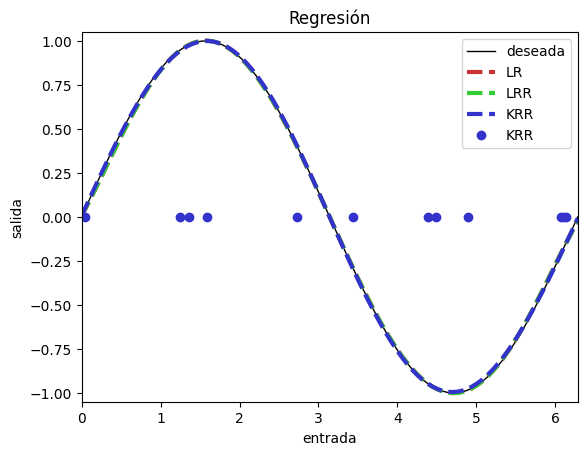

In [49]:
# Representación de la salida estimada

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X, y, 'k-', label='deseada', lw = 1)
plt.plot(X, y_lr, '--', color = (0.8, 0.2, 0.2), label = 'LR', lw = 3)
plt.plot(X, y_lrr, '--', color = (0.2, 0.8, 0.2), label = 'LRR', lw = 3)
plt.plot(X, y_krr, '--', color = (0.2, 0.2, 0.8), label = 'KRR', lw = 3)
plt.plot(X_train, np.zeros((12,1)), 'o', color = (0.2, 0.2, 0.8), label = 'KRR', lw = 3)

plt.xlim([0.0, X.max(0)])
plt.ylim([-1.05, 1.05])
plt.xlabel('entrada')
plt.ylabel('salida')
plt.title('Regresión')
plt.legend(loc="upper right")

### Implementación de funciones en la manera "manual"

In [50]:
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel
import matplotlib.pyplot as plt

In [51]:
def training(N = 20, seed = 4):
    rng = np.random.RandomState(seed)
    X_train = rng.uniform(0, np.pi * 2.0, N)[:, np.newaxis]
    y_train = np.sin(X_train)
    return X_train, y_train

In [52]:
def addones(XX):
    return np.concatenate([np.ones((XX.shape[0], 1)), XX], axis = 1)

In [53]:
def train_linear_models(X_train, y_train, M = 5, l = 0.001):
    XX = X_train
    
    for p in range(2, M + 1, 1):
        powers_of_X = X_train**p
        XX = np.concatenate([XX, powers_of_X], axis = 1)
    
    XX = addones(XX)
    Y = y_train

    # Regresión lineal sin regularización
    Wlr = np.linalg.inv(XX.T.dot(XX)).dot(XX.T).dot(Y)

    # Regresión lineal con regularización
    I = np.eye(XX.shape[1])

    Wlrr = np.linalg.inv(XX.T.dot(XX) + l * I).dot(XX.T).dot(Y)
    
    return Wlr, Wlrr

In [54]:
def train_nonlinear_model(X_train, y_train, lk = 0.001, gamma = 0.1):
    K = rbf_kernel(X_train, X_train, gamma = gamma)  # matriz kernel de train
    In = np.eye(K.shape[0])  # matriz identidad
    alpha = np.linalg.inv(K + lk * In).dot(y_train)  # pesos del modelo
    
    return alpha

In [55]:
def testing(N = 100, M = 5):
    
    X = np.linspace(0, np.pi * 2.0, N)[:, np.newaxis]

    y = np.sin(X)
    
    XX_test = X
    
    for p in range(2, M + 1):
        XX_test = np.concatenate([XX_test, X ** p], axis = 1)
    XX_test = addones(XX_test)
    
    return X, y, XX_test

In [56]:
def predictions(XX_test, Wlr, Wlrr, X, X_train, gamma, alpha):
    y_lr = XX_test.dot(Wlr) # predicción modelo lineal sin regularizar
    y_lrr = XX_test.dot(Wlrr) # predicción modelo lineal regularizado

    K_test = rbf_kernel(X, X_train, gamma = gamma) # matriz kernel de test para kernel ridge
    y_krr = K_test.dot(alpha) # predicción kernel ridge
    
    return y_lr, y_lrr, y_krr

In [57]:
def plot_estimated_output(X, y, y_lr, y_lrr, y_krr, X_train, N, M, gamma):
    
    plt.figure(figsize = (10, 6))
    plt.plot(X, y, 'k-', label='deseada', lw = 1)
    plt.plot(X, y_lr, '--', color=(0.8, 0.2, 0.2), label = f'LR {M}', lw = 3)
    plt.plot(X, y_lrr, '--', color=(0.2, 0.8, 0.2), label = f'LRR {M}', lw = 3)
    plt.plot(X, y_krr, '--', color=(0.2, 0.2, 0.8), label = f'KRR {gamma}', lw = 3)
    plt.plot(X_train, np.zeros((N, 1)), 'o', color = (0.2, 0.2, 0.8), label = 'KRR', lw = 3)

    plt.xlim([0.0, X.max()])
    plt.ylim([-1.05, 1.05])
    plt.xlabel('entrada')
    plt.ylabel('salida')
    plt.title('Regresión')
    plt.legend(loc = "upper right")
    plt.show()

In [58]:
def full_pipeline(N_train = 20, N_test = 100, seed = 4, M = 5, l = 0.001, lk = 0.001, gamma = 0.1):
    
    # Generación de datos de entrenamiento
    X_train, y_train = training(N_train, seed)

    # Entrenamiento de modelos lineales
    Wlr, Wlrr = train_linear_models(X_train, y_train, M, l)

    # Entrenamiento del modelo no lineal
    alpha = train_nonlinear_model(X_train, y_train, lk, gamma)

    # Generación de datos de prueba
    X, y, XX_test = testing(N_test, M)

    # Predicciones
    y_lr, y_lrr, y_krr = predictions(XX_test, Wlr, Wlrr, X, X_train, gamma, alpha)

    # Representación de la salida estimada
    plot_estimated_output(X, y, y_lr, y_lrr, y_krr, X_train, N_train, M, gamma)
    
    # añadir rmse a cada una para ponerla.
    return M


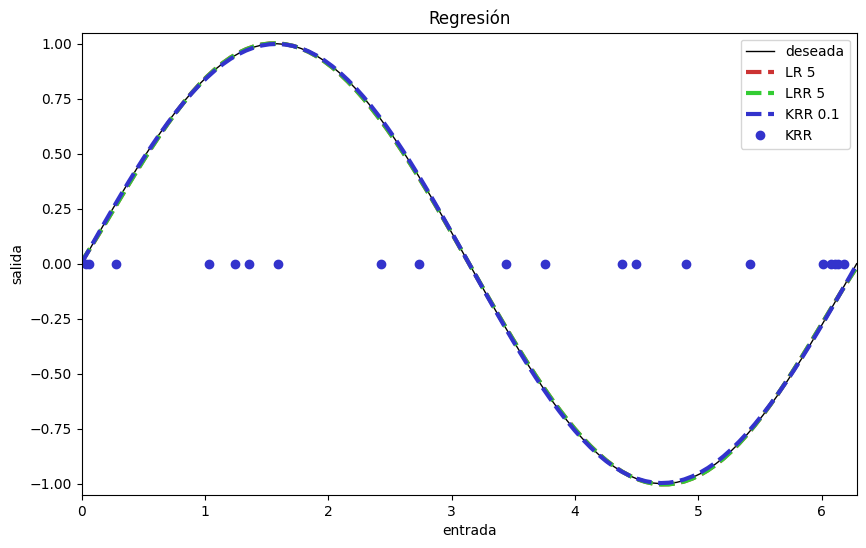

5

In [79]:
full_pipeline(N_train = 20, N_test = 100, M = 5, l = 0.001, lk = 0.001, gamma = 0.1)